#**Regression Analysis on CRIME RATE AND POPULATION**

1. **STUDYNO**: ICPSR STUDY NUMBER
2. **EDITION:**ICPSR EDITION NUMBER
3.**PART**: ICPSR PART NUMBER-4
4. **IDNO:** ICPSR SEQUENTIAL CASE ID NUMBER
5. **FIPS_ST**: FIPS STATE CODE
6. **FIPS_CTY:** FIPS COUNTY CODE
7. **CPOPARST:** TOT CNTY POPULATION-AGENCIES RPRT ARRSTS
8. **CPOPCRIM:** COUNTY POPULATION-AGENCIES REPORT CRIMES
9. **AG_ARRST:** NMBR OF AGENCIES IN CNTY REPORT ARRESTS
11. **AG_OFF:** NMBR OF AGENCIES IN COUNTY REPORT CRIMES
12. **COVIND:** COVERAGE INDICATOR
13.**VIOL:** TOTAL VIOLENT CRIMES
14. **PROPERTY:** TOTAL PROPERTY CRIMES
15. **MURDER:** MURDERS
16. **RAPE:** RAPES 
17.**ROBBERY:** ROBBERIES
18. **AGASSLT:** AGGRAVATED ASSAULTS
19. **BURGLRY:** BURGLARIES
20. **LARCENY:** LARCENIES
21. **MVTHEFT:** MOTOR VEHICLE THEFTS 
22. **ARSON:** ARSONS
23. **COUNTY_NAME** : Name of the county.
24. **CRIME_RATE_PER_100000** : crime rate per 100000 of population.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
%matplotlib inline
import seaborn as sns
df=pd.read_csv('/content/crime_data_w_population_and_crime_rate.csv')
df

,county_name,crime_rate_per_100000,index,EDITION,PART,IDNO,CPOPARST,CPOPCRIM,AG_ARRST,AG_OFF,COVIND,INDEX,MODINDX,MURDER,RAPE,ROBBERY,AGASSLT,BURGLRY,LARCENY,MVTHEFT,ARSON,population,FIPS_ST,FIPS_CTY
0,"St. Louis city, MO",1791.995377,1,1,4,1612,318667,318667,15,15,100.0,5706,22329,119,200,1778,3609,4995,13791,3543,464,318416,29,510
1,"Crittenden County, AR",1754.914968,2,1,4,130,50717,50717,4,4,100.0,873,3424,8,38,165,662,1482,1753,189,28,49746,5,35
2,"Alexander County, IL",1664.700485,3,1,4,604,8040,8040,2,2,100.0,127,278,1,2,5,119,82,184,12,2,7629,17,3
3,"Kenedy County, TX",1456.310680,4,1,4,2681,444,444,1,1,100.0,6,13,0,3,1,2,5,4,4,0,412,48,261
4,"De Soto Parish, LA",1447.402430,5,1,4,1137,26971,26971,3,3,100.0,392,703,3,4,17,368,149,494,60,0,27083,22,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3131,"Ohio County, IN",0.000000,3132,1,4,762,6084,0,2,1,100.0,0,5,0,0,0,0,2,2,0,0,5994,18,115
3132,"Newton County, MS",0.000000,3133,1,4,1465,21545,3346,3,1,100.0,0,5,0,0,0,0,4,0,1,0,21689,28,101
3133,"Jerauld County, SD",0.000000,3134,1,4,2424,2108,2108,1,1,100.0,0,5,0,0,0,0,1,3,1,0,2066,46,73
3134,"Cimarron County, OK",0.000000,3135,1,4,2167,2502,2502,2,2,100.0,0,3,0,0,0,0,1,2,0,0,2335,40,25


## I do not need the "'county_name','index', 'EDITION', 'PART','IDNO', 'CPOPARST', 'CPOPCRIM' 'AG_ARRST', 'AG_OFF', 'COVIND', 'INDEX','MODINDX','FIPS_ST','FIPS_CTY' " columns since they are not helpful for regression.So I dropped these columns.

In [2]:
df.drop(columns=['index', 'EDITION', 'PART',
       'IDNO', 'CPOPARST', 'CPOPCRIM', 'AG_ARRST', 'AG_OFF', 'COVIND', 'INDEX',
       'MODINDX','FIPS_ST','FIPS_CTY'],inplace=True)

In [3]:
df.drop(columns=['county_name'],inplace=True)

In [42]:
df.to_csv('cleanedupdata.csv',index=False)

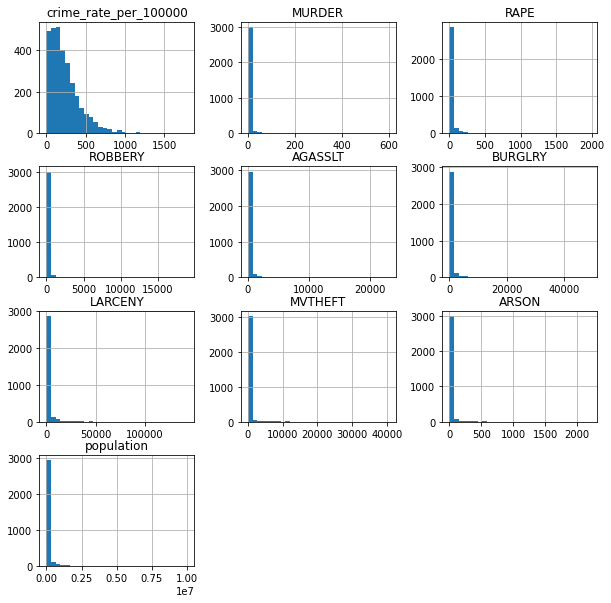

In [5]:
plt.rcParams["figure.figsize"] = (10,10)
df.hist(bins=30)
plt.show()

## This histogram shows that all the variables follow a similar trend except crime rate which has an exponentially decreasing pattern.

In [6]:
df["const"] = 1

# Adding a constant column to df for linear regression.
Ref: https://github.com/appliedecon/data602-lectures/blob/main/week04/linear-regression-introduction.ipynb

In [7]:
import statsmodels.api as smf
statsModelsCoefs = smf.OLS(df['population'], df[['crime_rate_per_100000', 'MURDER', 'RAPE', 'ROBBERY','AGASSLT', 'BURGLRY', 'LARCENY', 'MVTHEFT', 'ARSON','const']].astype(float)).fit()
print(statsModelsCoefs.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


                            OLS Regression Results                            
Dep. Variable:             population   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     5070.
Date:                Tue, 12 Oct 2021   Prob (F-statistic):               0.00
Time:                        02:30:37   Log-Likelihood:                -39920.
No. Observations:                3136   AIC:                         7.986e+04
Df Residuals:                    3126   BIC:                         7.992e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
crime_rate_per_100000  -100.32

r2 is 0.936 i.e. this model describes almost 94% of the data.Also, the t-static values for each column are acceptable.

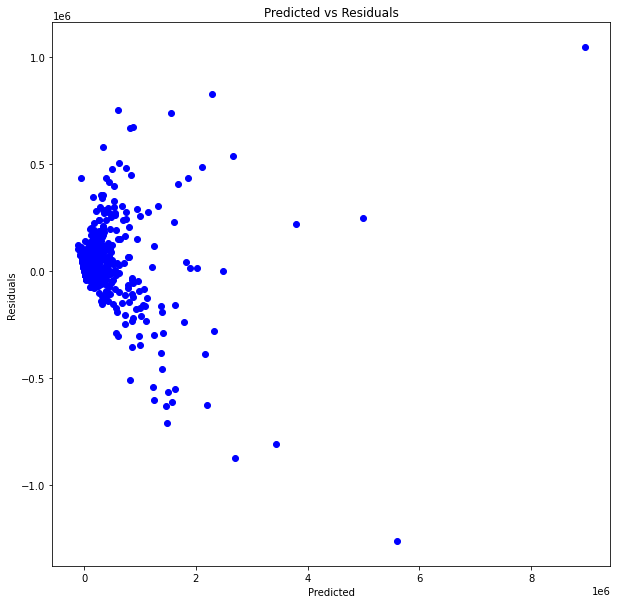

In [36]:
yhat = statsModelsCoefs.predict(df[['crime_rate_per_100000', 'MURDER', 'RAPE', 'ROBBERY','AGASSLT', 'BURGLRY', 'LARCENY', 'MVTHEFT', 'ARSON','const']].astype(float))
resid_boston = df['population'] - yhat
plt.plot(yhat, resid_boston, 'bo')
plt.title('Predicted vs Residuals')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.show()



In [37]:
df['population']

0       318416
1        49746
2         7629
3          412
4        27083
         ...  
3131      5994
3132     21689
3133      2066
3134      2335
3135     12514
Name: population, Length: 3136, dtype: int64

In [38]:
yhat

0       827366.463823
1       -62729.812214
2      -114883.777069
3      -104623.088924
4       -67623.277558
            ...      
3131     39585.671146
3132     39466.660256
3133     39740.243407
3134     39641.915309
3135     39628.259030
Length: 3136, dtype: float64

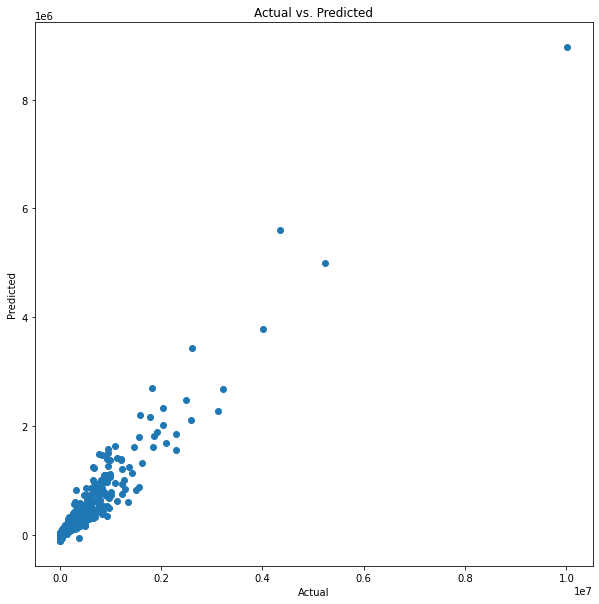

In [41]:
plt.scatter(df['population'], yhat)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.show()

#As f

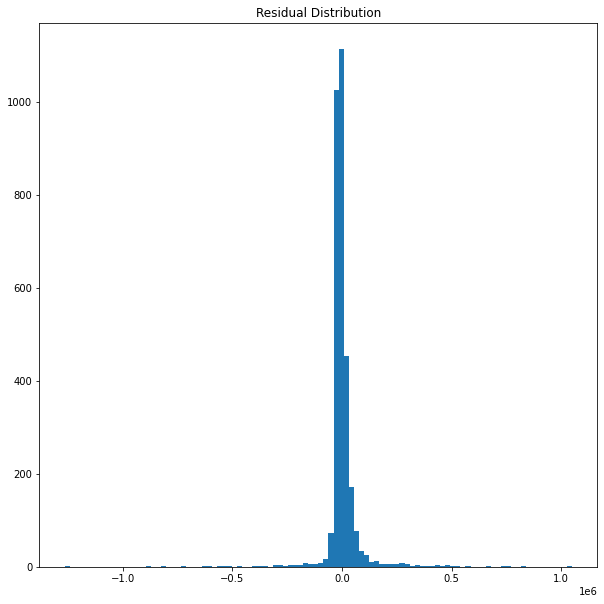

In [11]:
plt.hist(resid_boston,bins=100)
plt.title('Residual Distribution')
plt.show()

## **As we can see that most of the concentration is around 0 and from the residual of y to y^ we can tell that difference between them is almost equal to 0 or near to that which defines our prediction to be good**

In [12]:
y=df['population']
X = df[['crime_rate_per_100000', 'MURDER', 'RAPE', 'ROBBERY','AGASSLT', 'BURGLRY', 'LARCENY', 'MVTHEFT', 'ARSON','const']].astype(float)

In [13]:
from sklearn.model_selection import train_test_split
X_training, X_test, y_training, y_test = train_test_split(X, y, test_size=0.20,random_state = 50)
print(f'Training samples: {X_training.shape[0]:,}')
print(f'Test samples: {X_test.shape[0]:,}')

Training samples: 2,508
Test samples: 628


In [14]:
statsModelsCoefs_1= smf.OLS(y_test, X_test[['crime_rate_per_100000', 'MURDER', 'RAPE', 'ROBBERY','AGASSLT','BURGLRY','LARCENY','MVTHEFT','ARSON','const']].astype(float)).fit()
print(statsModelsCoefs_1.summary())

 

                            OLS Regression Results                            
Dep. Variable:             population   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     741.6
Date:                Tue, 12 Oct 2021   Prob (F-statistic):               0.00
Time:                        02:31:29   Log-Likelihood:                -7842.3
No. Observations:                 628   AIC:                         1.570e+04
Df Residuals:                     618   BIC:                         1.575e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
crime_rate_per_100000  -103.19

#**As discussed from the residual the difference between the Y and Y^ tends almost to be zero and it is evident from the summary of the test data. The R-square value of the test_data is 91% and the R-square value of the train_data is 93%.  This shows the model is neither over fitted nor under fitted but even after the data preprocessed we can see some of the outlier crawling over the graph.**

In [15]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

polys = []
non_polys = ['crime_rate_per_100000','MURDER', 'RAPE', 'ROBBERY','AGASSLT', 'BURGLRY', 'LARCENY', 'MVTHEFT', 'ARSON']

poly_pipeline = Pipeline([('add_polynomials', PolynomialFeatures(3, include_bias=False)),
                           ('standardize_poly', StandardScaler())
                        ])

processing_pipeline = ColumnTransformer(transformers=[('poly_processing', poly_pipeline, polys),
                                ('nonpoly_scaling', StandardScaler(), non_polys)
                               ])

In [16]:
from sklearn.linear_model import LinearRegression
modeling_pipeline = Pipeline([('data_processing', processing_pipeline), ('lm', LinearRegression())])
modeling_pipeline.fit(X_training, y_training)

Pipeline(memory=None,
         steps=[('data_processing',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('poly_processing',
                                                  Pipeline(memory=None,
                                                           steps=[('add_polynomials',
                                                                   PolynomialFeatures(degree=3,
                                                                                      include_bias=False,
                                                                                      interaction_only=False,
                                                                                      order='C')),
                                                                  ('standardize_poly',
                                 

In [17]:
modeling_pipeline['lm'].coef_

array([ -17689.28040394,  -60376.61141765,   56286.24344393,
         77673.22576485,   66843.19913761, -128230.93337995,
        210789.22306028,   89309.53400696,   36322.5947642 ])

In [18]:
modeling_pipeline.score(X_training, y_training)

0.9444038930893155

In [19]:
modeling_pipeline.score(X_test, y_test)

0.8345014055010702

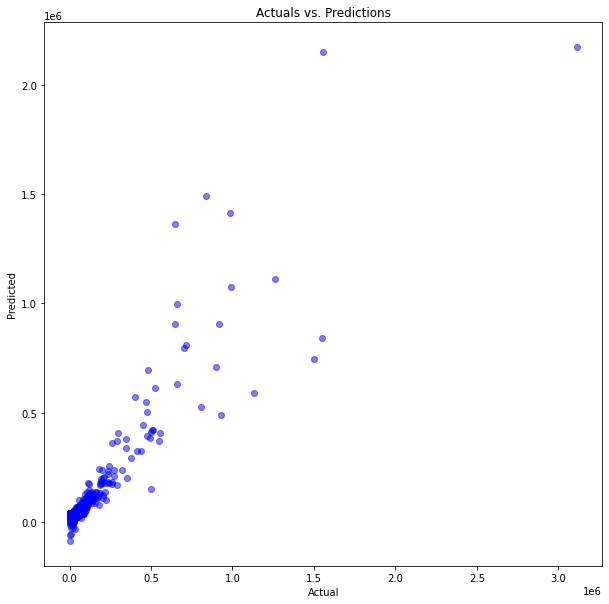

In [20]:
yhat_test = modeling_pipeline.predict(X_test)
plt.plot(y_test, yhat_test, 'bo', alpha=0.5)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actuals vs. Predictions')
plt.show()

In [21]:
from sklearn.linear_model import Ridge

modeling_pipeline_ridge = Pipeline([('data_processing', processing_pipeline), ('ridge', Ridge(alpha=0))])
modeling_pipeline_ridge.fit(X_training, y_training)
modeling_pipeline_ridge['ridge'].coef_

array([ -17689.28040394,  -60376.61141765,   56286.24344393,
         77673.22576484,   66843.19913762, -128230.93337995,
        210789.22306028,   89309.53400696,   36322.5947642 ])

In [22]:
modeling_pipeline['lm'].coef_

array([ -17689.28040394,  -60376.61141765,   56286.24344393,
         77673.22576485,   66843.19913761, -128230.93337995,
        210789.22306028,   89309.53400696,   36322.5947642 ])

In [23]:
from collections import defaultdict
alphas = [0,1,4,8,10]
ridge_results = defaultdict(dict)
for alph in alphas:
    modeling_pipeline_ridge = Pipeline([('data_processing', processing_pipeline), ('ridge', Ridge(alpha=alph))])
    modeling_pipeline_ridge.fit(X_training, y_training)
    ridge_results['coefficients'][alph] = modeling_pipeline_ridge['ridge'].coef_
    ridge_results['training score'][alph] = modeling_pipeline_ridge.score(X_training, y_training)
    ridge_results['test score'][alph] = modeling_pipeline_ridge.score(X_test, y_test)

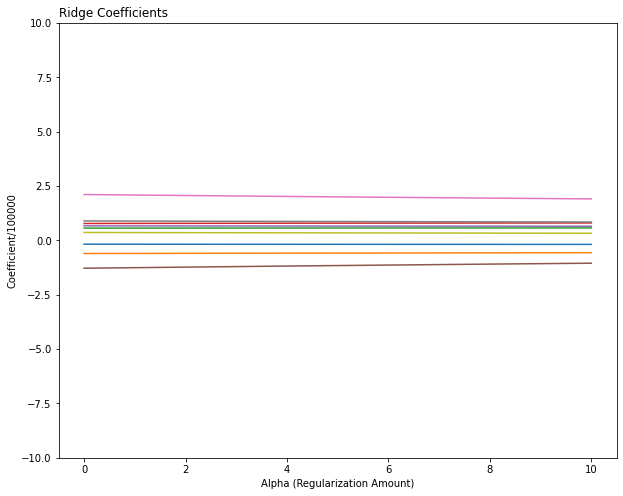

In [24]:
coefficients = pd.DataFrame.from_dict(ridge_results['coefficients'])
coefficients = (coefficients/100000).reset_index()
coefficients = coefficients.rename(columns={'index':'coefficient_nbr'})
coefficients = coefficients.melt(id_vars='coefficient_nbr', var_name='alpha', value_name='coefficient')

(
coefficients.pivot_table(index='alpha', columns='coefficient_nbr', values='coefficient')
    .plot(figsize=(10,8),legend=False)
)

plt.title('Ridge Coefficients', loc='left')
plt.xlabel('Alpha (Regularization Amount)')
plt.ylabel('Coefficient/100000')
plt.ylim(-10,10)
plt.show()

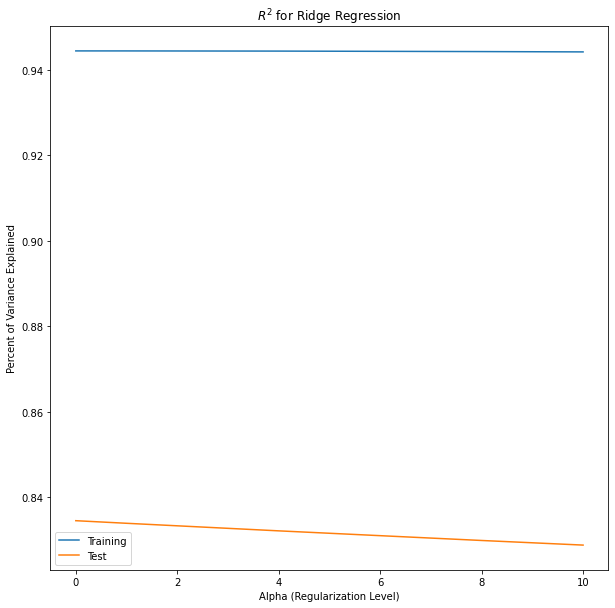

In [25]:
ridge_training_r2 = pd.Series(ridge_results['training score'])
ridge_test_r2 = pd.Series(ridge_results['test score'])
ridge_training_r2.plot()
ridge_test_r2.plot()
plt.title('$R^2$ for Ridge Regression')
plt.legend(['Training','Test'])
plt.xlabel('Alpha (Regularization Level)')
plt.ylabel('Percent of Variance Explained')
plt.show()

In [26]:
from sklearn.linear_model import Lasso
from collections import defaultdict
alphas = [0,1,4,8,10]
lasso_results = defaultdict(dict)
for alph in alphas:
    modeling_pipeline_lasso = Pipeline([('data_processing', processing_pipeline), ('lasso', Lasso(alpha=alph))])
    modeling_pipeline_lasso.fit(X_training, y_training)
    lasso_results['coefficients'][alph] = modeling_pipeline_lasso['lasso'].coef_
    lasso_results['training score'][alph] = modeling_pipeline_lasso.score(X_training, y_training)
    lasso_results['test score'][alph] = modeling_pipeline_lasso.score(X_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py:354: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8222766773064.3955, tolerance: 29580368950.201313
  positive)


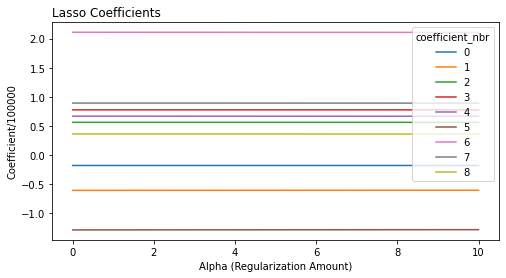

In [27]:
coefficients = pd.DataFrame.from_dict(lasso_results['coefficients'])
coefficients = (coefficients/100000).reset_index()
coefficients = coefficients.rename(columns={'index':'coefficient_nbr'})
coefficients = coefficients.melt(id_vars='coefficient_nbr', var_name='alpha', value_name='coefficient')
coefficients.pivot_table(index='alpha', columns='coefficient_nbr', values='coefficient').plot(figsize=(8,4))
plt.title('Lasso Coefficients', loc='left')
plt.xlabel('Alpha (Regularization Amount)')
plt.ylabel('Coefficient/100000')
plt.show()

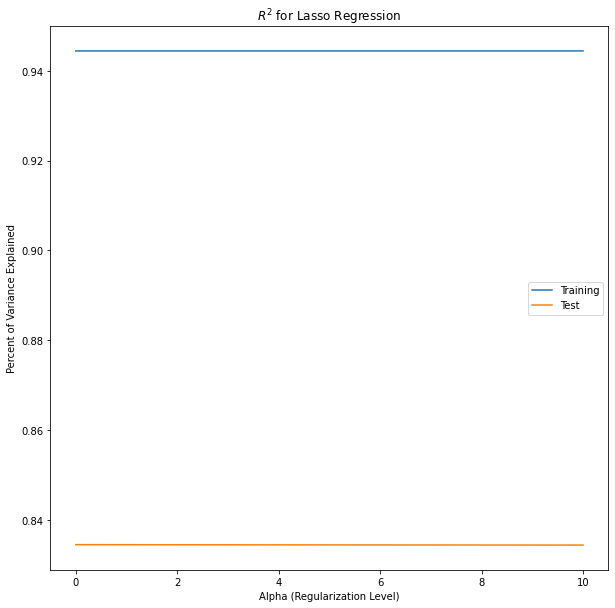

In [28]:
lasso_training_r2 = pd.Series(lasso_results['training score'])
lasso_test_r2 = pd.Series(lasso_results['test score'])

lasso_training_r2.plot()
lasso_test_r2.plot()
plt.title('$R^2$ for Lasso Regression')
plt.legend(['Training','Test'])
plt.xlabel('Alpha (Regularization Level)')
plt.ylabel('Percent of Variance Explained')
plt.show()

# **Run a Ridge or Lasso regression with a few different levels of regularization strength. Does this help or hurt performance? What happens as you increase the regularization strength? How do the coefficients compare with OLS? Explain what you are seeing and provide any supporting charts.**

## Upon running the ridge regression with the various levels of the regularization of 0,1,4,8,10 we got the training R-square over above94% where as it declined over the increase of the lambda which indeed hurts the prediction. The coefficient when compared to the OLS seems to be invariably big and should evident that it doesn't square and to optmize the solutiong the coefficients tends to be big. The Graphs for the provided information are implemented below with different levels of regularization.